# k-NN (k-Nearest Neighbors)


k-Nearest Neighbors (k-NN) เป็น Supervised Machine Learning Algorithm แบบ non-parametric กล่าวคือ k-NN algorithm เป็นการเรียนรู้ของเครื่องที่ไม่มีโมเดลพารามิเตอร์ แต่อ้างอิงจากความใกล้ชิดของข้อมูล (proximity) สามารถใช้ในการจำแนกและคาดการณ์ข้อมูลบนสมมติฐานที่ว่า จะพบจุดข้อมูลที่คล้ายกันจะอยู่ใกล้กัน

กระบวนการทำงานของ K-NN algorithm เริ่มต้นด้วยการค้นหาจุดข้อมูลจำนวน k จุดที่อยู่ใกล้กับจุดข้อมูลที่สนใจมากที่สุด โดยพิจารณาจากระยะห่างระหว่างจุดข้อมูล (distance) จากนั้นจึงตัดสินใจด้วยการโหวตเพื่อกำหนดหมวดหมู่หรือค่าที่ถูกที่สุดของจุดข้อมูลที่สนใจจาก k จุดข้อมูลที่อยู่โดยรอบ


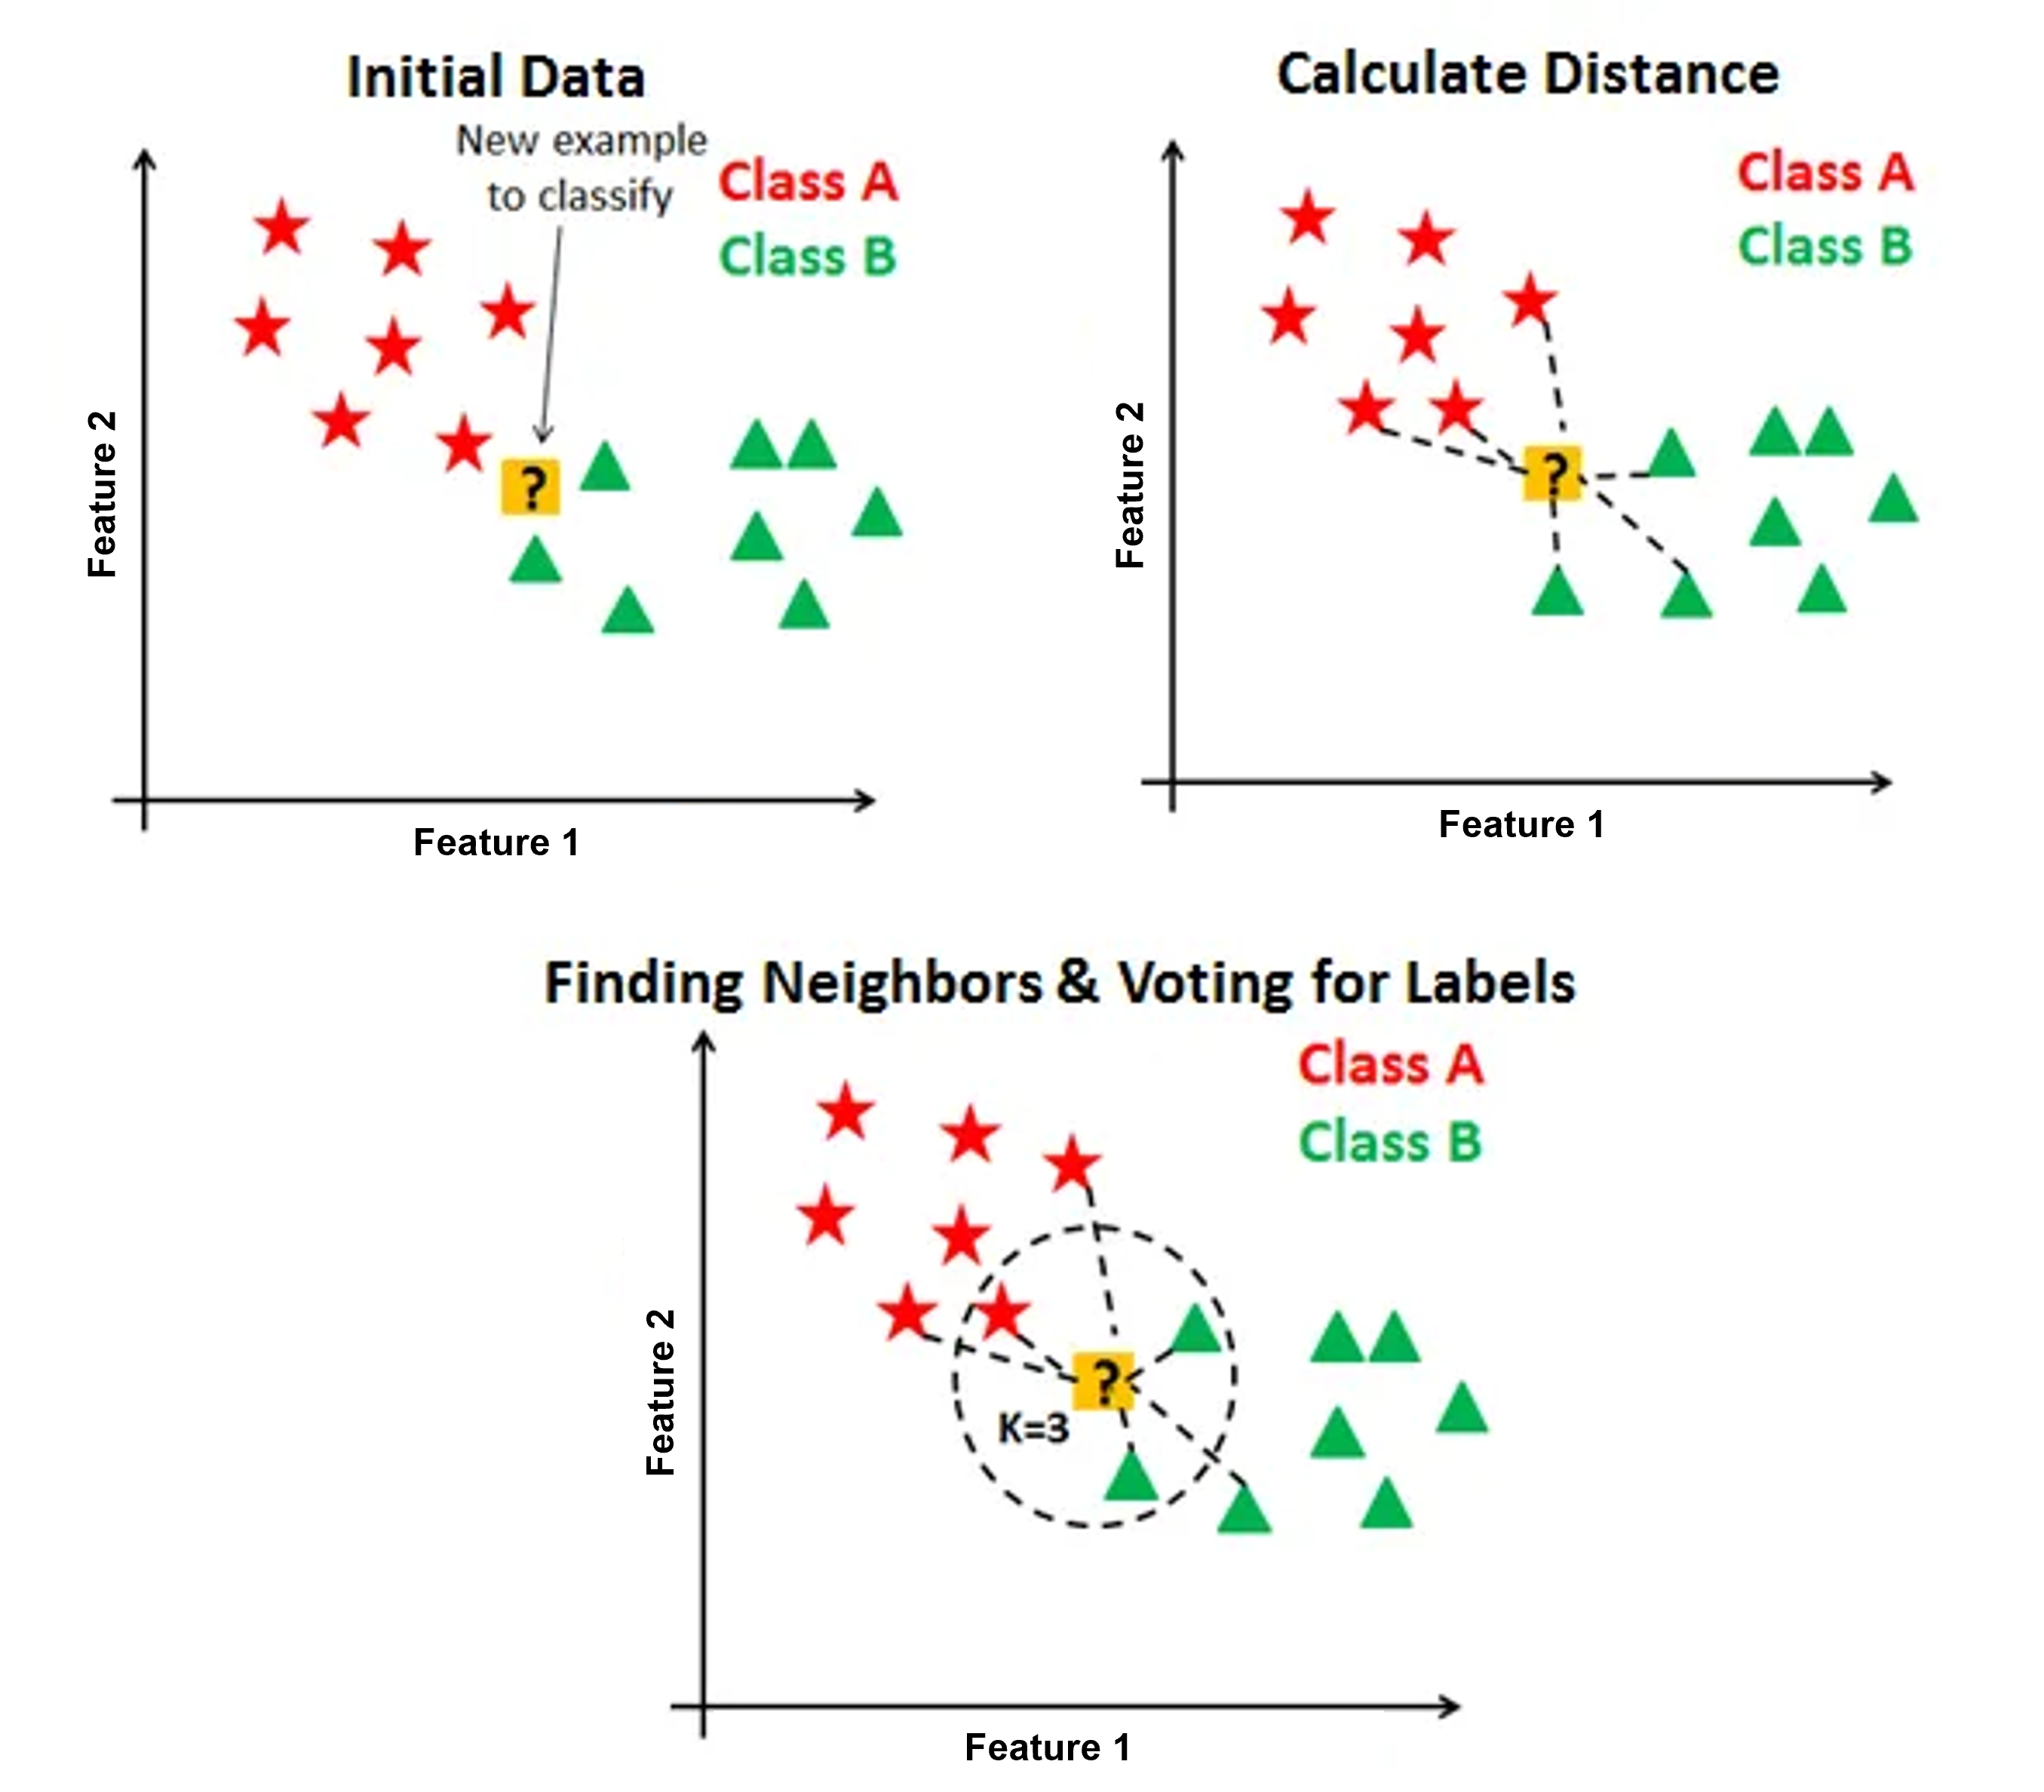 k-NN algorithm adapted from [ที่มา](https://blakelobato1.medium.com/k-nearest-neighbor-classifier-implement-homemade-class-compare-with-sklearn-import-6896f49b89e)

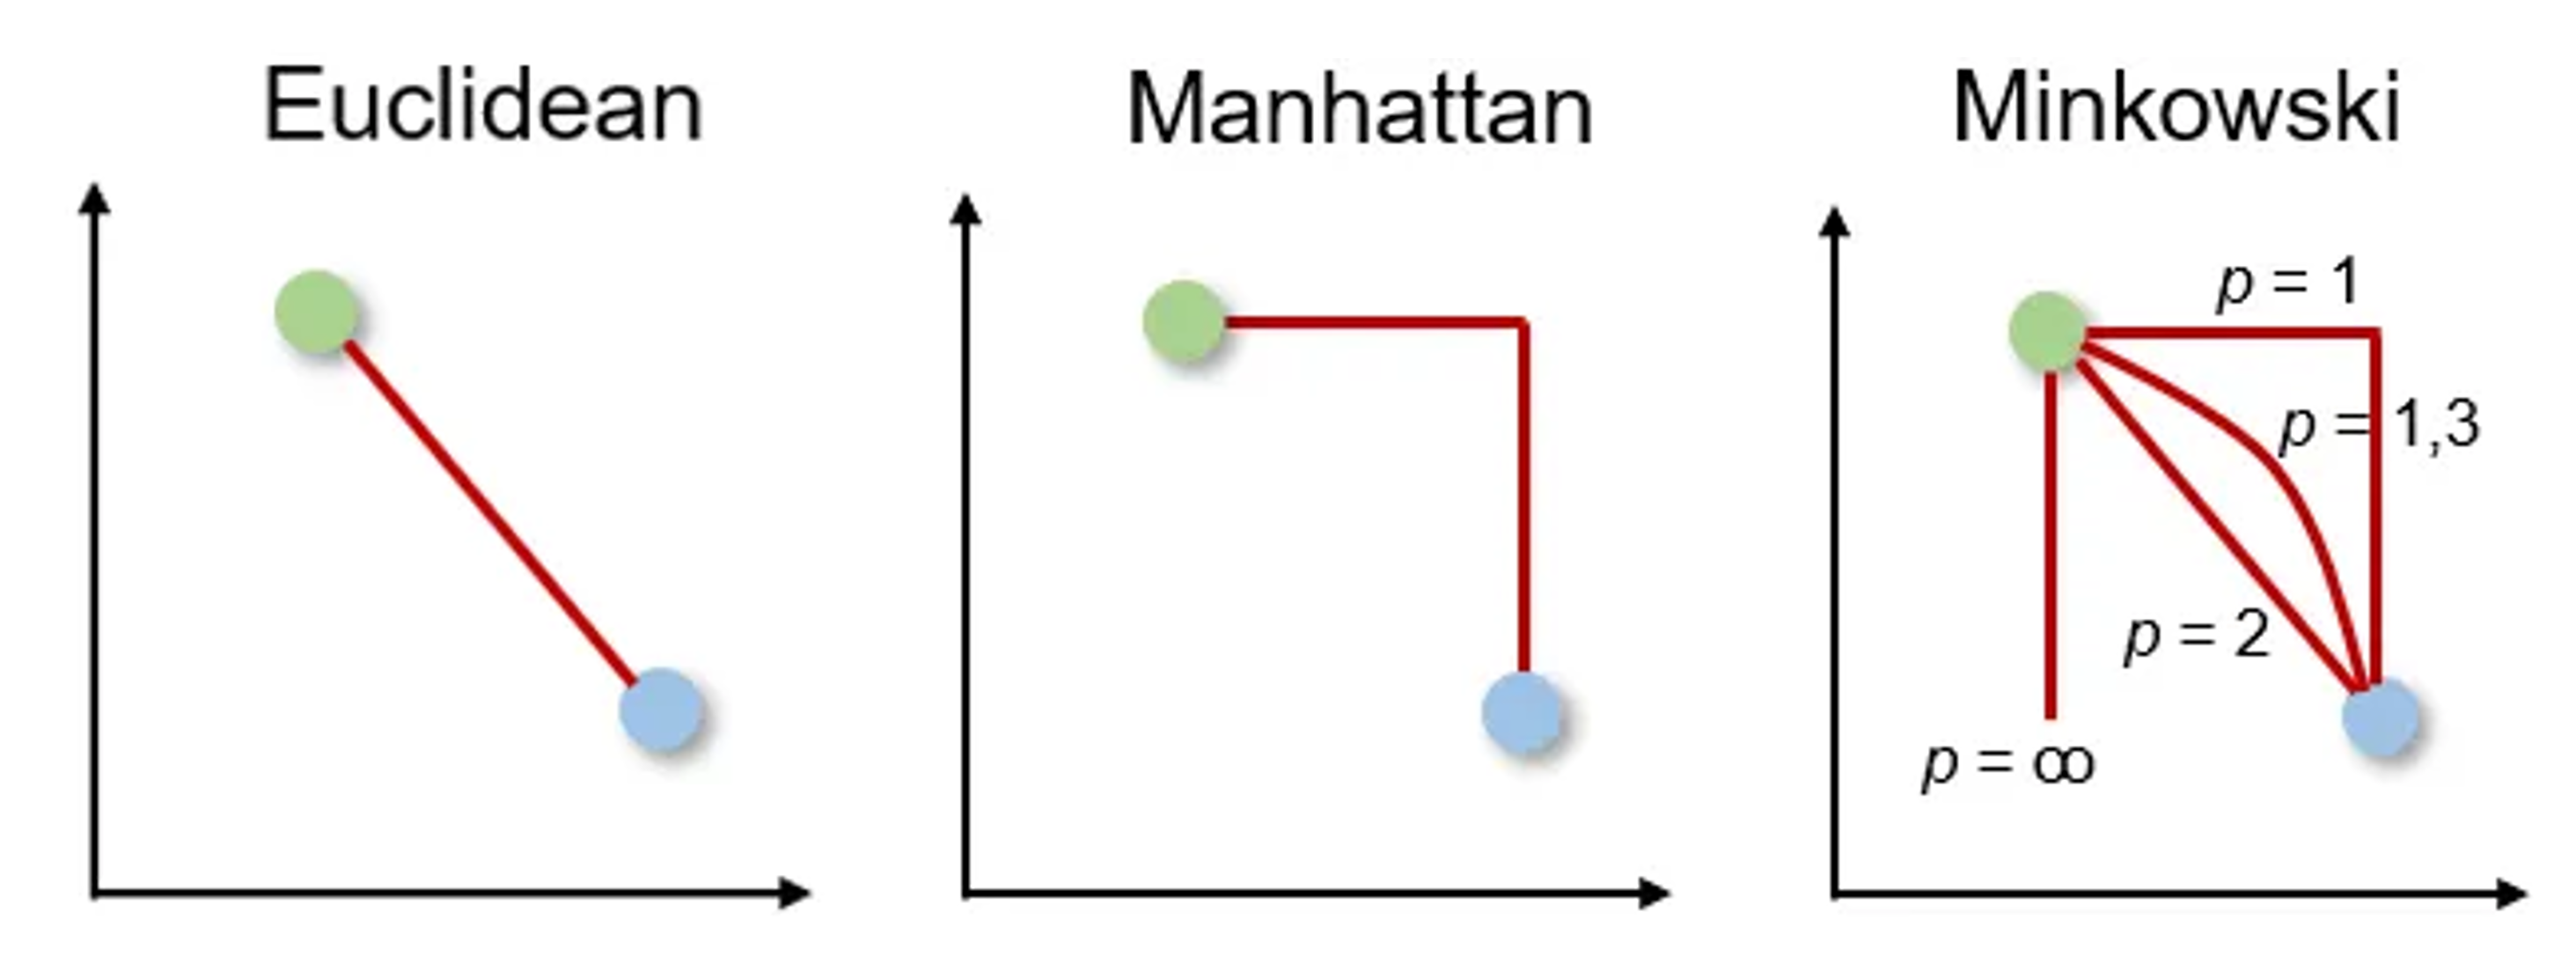 ที่มา [A brief introduction to Distance Measures](https://medium.com/mlearning-ai/a-brief-introduction-to-distance-measures-ac89cbd2298)

สมมติว่า จุดข้อมูล 2 จุดบน feature space สามารถแทนด้วยเวกเตอร์ $\vec{r_1}=(r_{1,1}, r_{1,2},..., r_{1,i},..., r_{1,m})$ และ $\vec{r_2}=(r_{2,1}, r_{2,2},..., r_{2,i},..., r_{2,m})$  เมื่อ  $m$ คือ จำนวน features  การหาระยะห่างระหว่างจุดข้อมูลทั้งสองสามารถคำนวณได้หลายวิธี โดยเราจะยกตัวอย่าง 3 สมการหลักที่่ใช้กันทั่วไป ได้แก่

1. Euclidean Distance

Euclidean distance คือระยะทางเป็นเส้นตรงระหว่างจุดสองจุดใน Euclidean space จึงสามารถคำนวณได้โดยใช้ทฤษฎีพีทาโกรัส (Pythagorean theorem)

$$
d_{Euclidean}(\vec{r_1},\vec{r_2}) = \sqrt{\sum_{j=1}^{m} (r_{1,j} - r_{2,j})^2}
$$

2. Manhattan Distance:

Manhattan distance หรือที่รู้จักกันในอีกชื่อ taxicab distance เนื่องจากพัฒนามาจากแนวคิดที่ว่า ระยะห่างระหว่างจุดสองจุดสามารถหาได้จากเส้นตาราง (grid) แทนที่จะเป็นเส้นตรง เหมือนเวลาที่รถแท็กซี่ขับไปบนถนนจากจุดหนึ่งไปสู่อีกจุดหนึ่งบนเกาะ Manhattan ที่มีการวางผังถนนเป็นเส้นตรงตัดกัน  ดังนั้น Manhattan distance คำนวณระยะห่างโดยรวมความแตกต่างสัมบูรณ์ของพิกัดระหว่างจุดสองจุด
$$
d_{Manhattan}(\vec{r_1},\vec{r_2}) = \sum_{j=1}^{m} |r_{1,j} - r_{2,j}|
$$

3. Minkowski Distance

Minkowski distance เป็นการ generalization ของ Euclidean distance และ Manhattan distance

$$
d_{Minkowski}(\vec{r_1},\vec{r_2}) = \sum_{j=1}^{m} \big(|r_{1,j} - r_{2,j}|^p\big)^{1/p}
$$

พารามิเตอร์ $p\ge1$ ใช้กำหนดรูปแบบของระยะทาง โดย
- เมื่อ $p=1$ Minkowski distance จะมีค่าเท่ากับ Manhattan distance
- เมื่อ $p=2$ Minkowski distance จะมีค่าเท่ากับ Euclidean distance
- เมื่อ $1<p<2$ Minkowski distance จะมีคุณลักษณะผสมผสานระหว่าง Euclidean distance และ Manhattan distance
ซึ่งสามารถควบคุมได้โดยการปรับค่า $p$

สำหรับ classification problem เราสามารถเทรนโมเดล k-NN ด้วย  [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) จากไลบราลี่ `scikit-learn` โดย Minkowski Distance และ $p=2$ เป็น default 'metric' (ซึงก็คือ Euclidean distance)  นอกจากนี้ ค่า k จะกำหนดด้วย hyperparameter ชื่อ 'n_neighbors'

โมเดล k-NN สามารถทำได้ทั้งการจำแนกหมวดหมู่ (classification) และ การทำนายค่า (regression) โดยในบทเรียนนี้ เราจะแสดงการทำงานของโมเดลกับโจทย์การจำแนกหมวดหมู่

เพื่อศึกษาการทำงานของ k-NN เราจะลองสร้างชุดข้อมูลที่ประกอบไปด้วย จำนวน $n=200$ จุด โดยประกอบด้วย 2 features และ $y$ มีค่า 0 หรือ 1 (2-class dataset for binary classification)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ตั้งค่า random seed สำหรับการทำซ้ำ (reproducibility)
RANDOM_SEED = 2566
np.random.seed(RANDOM_SEED)

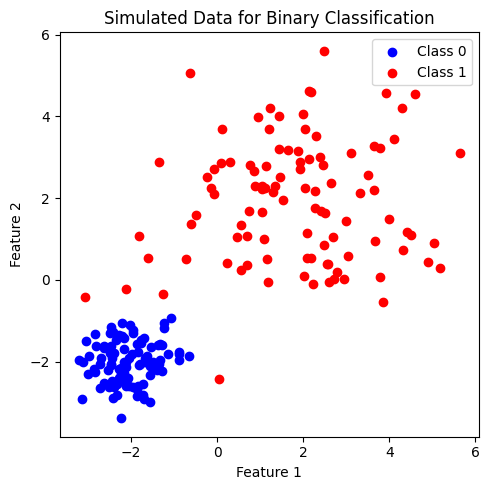

In [19]:
def generate_multi_class_dataset(n_classes, mean_class, std_class,n_samples):
    # สร้างชุดข้อมูลแบบ multi-class

    # กำหนด จำนวน features
    n_features = 2

    #  สร้างข้อมูล x สำหรับแต่ละคลาส
    x_data = []
    for label in range(n_classes):
        _ = np.random.normal(mean_class[label], std_class[label], (n_samples, n_features))
        x_data.append(_)

    # สร้างข้อมูล y หรือ labels สำหรับแต่ละคลาส
    y_data = []
    y_data.append(np.zeros(n_samples))
    for label in range(1, n_classes):
        y_data.append(label*np.ones(n_samples))

    # รวมข้อมูล x และ y จากทุกคลาส
    x = np.vstack((x_data))
    y = np.hstack(y_data)

    return x, y

# ทดลองสร้างข้อมูลโดยการเรียกใช้ generate_multi_class_dataset
# กำหนด จำนวนคลาส
n_classes = 2

# กำหนดช่วงค่า Mean และ standard deviation สำหรับแต่ละคลาส
mean_class = [[-2,-2], [2,2]]
std_class  = [[0.5,0.5], [1.5,1.5]]

# กำหนดจำนวนข้อมูล สำหรับแต่ละคลาส
n_samples = 100

# ทำการสร้างชุดข้อมูล
x, y = generate_multi_class_dataset(n_classes, mean_class, std_class,n_samples)

# Plot ข้อมูล x, y ที่มีอยู่
plt.figure(figsize = (5,5))
plt.scatter(x[y==0, 0], x[y==0, 1], c='b', label='Class 0')
plt.scatter(x[y==1, 0], x[y==1, 1], c='r', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated Data for Binary Classification')
plt.legend()
plt.tight_layout()
plt.show()

## k-NN เมื่อปรับชนิด 'metric' ที่ใช้คำนวณ distance ระหว่างจุดข้อมูล

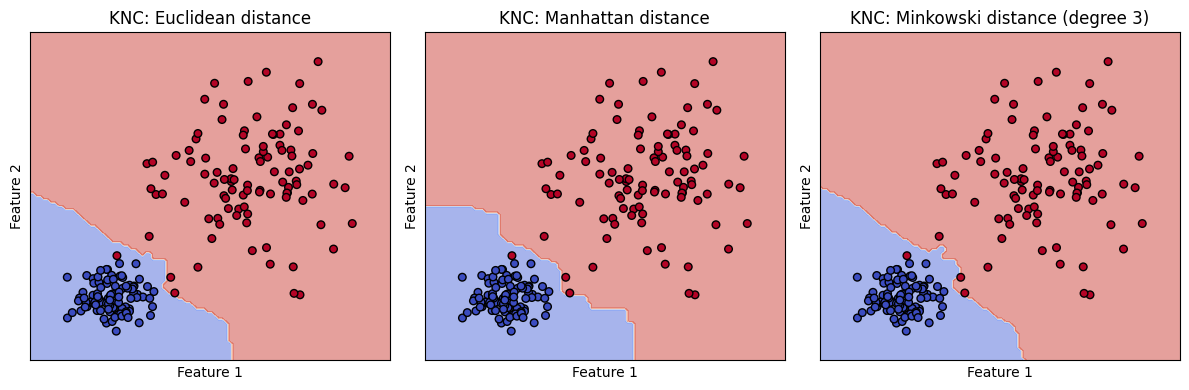

In [3]:
# สร้างชุดโมเดล
weight = 'uniform'
models = (KNC(weights=weight, n_neighbors=3, metric='euclidean'),
          KNC(weights=weight, n_neighbors=3, metric='manhattan'),
          KNC(weights=weight, n_neighbors=3, metric='minkowski', p=3),
          )

# สอนโมเดลจากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้
models = (clf.fit(x, y) for clf in models)

# ตั้งชื่อ plot ที่สอดคล้องกับชุดข้อมูล
titles = ['KNC: Euclidean distance',
          'KNC: Manhattan distance',
          'KNC: Minkowski distance (degree 3)'
          ]

# plot the decision boundaries
fig, axes = plt.subplots(1,3, figsize=(4*3, 4))
for clf, title, ax in zip(models, titles, axes.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(clf,
                                                  x,
                                                  response_method="predict",
                                                  cmap=plt.cm.coolwarm,
                                                  alpha=0.5,
                                                  ax=ax,
                                                  xlabel='Feature 1',
                                                  ylabel='Feature 2',
                                                  )
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.tight_layout()
plt.show()

รูปแสดง decision boundary (เขตแดนแบ่งแยก 2 คลาส) ของโมเดล k-NN เมื่อเลือกกำหนด 'metric' ที่คำนวณ distance ระหว่างจุดข้อมูลที่ต่างกันไป จะสังเกตเห็นว่า เมื่อเลือกใช้ Manhattan distance จะได้ decision boundary ที่มีลักษณะเหมือนขีดเส้นบน grid

## k-NN เมื่อปรับค่า 'n_neighbors'



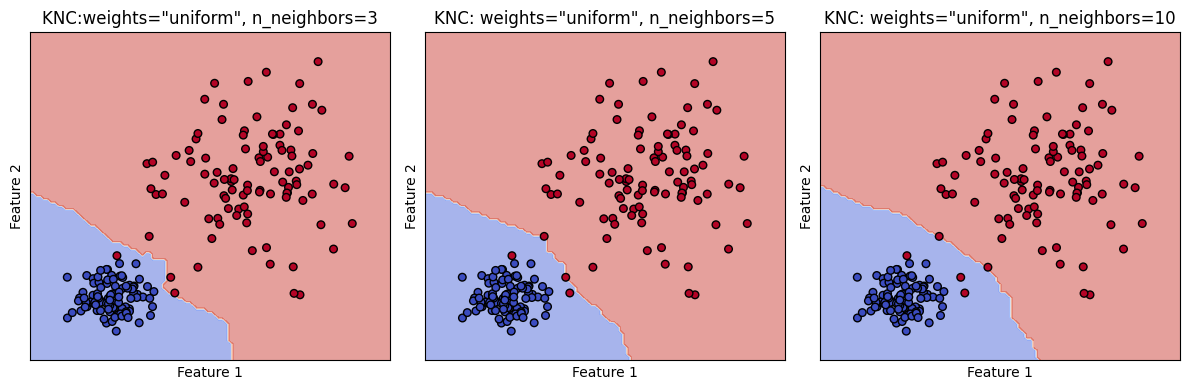

In [13]:
# สร้างชุดโมเดล
weight = 'uniform'
models = (KNC(weights=weight, n_neighbors=3),
          KNC(weights=weight, n_neighbors=5),
          KNC(weights=weight, n_neighbors=10),
          )

# สอนโมเดลจากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้
models = (clf.fit(x, y) for clf in models)

# ตั้งชื่อ plot ที่สอดคล้องกับชุดข้อมูล
titles = ['KNC:weights="uniform", n_neighbors=3',
          'KNC: weights="uniform", n_neighbors=5',
          'KNC: weights="uniform", n_neighbors=10'
          ]

# plot the decision boundaries
fig, axes = plt.subplots(1,3, figsize=(4*3, 4))
for clf, title, ax in zip(models, titles, axes.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(clf,
                                                  x,
                                                  response_method="predict",
                                                  cmap=plt.cm.coolwarm,
                                                  alpha=0.5,
                                                  ax=ax,
                                                  xlabel='Feature 1',
                                                  ylabel='Feature 2',
                                                  )
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.tight_layout()
plt.show()

การเลือกค่า 'n_neighbors' ที่เหมาะสมจะมีความจำเพาะต่อชุดข้อมูล  ยิ่งให้ค่า 'n_neighbors' มีค่ามากจะช่วยลดผลของ noise ทำให้ได้ decision boundary ที่ smooth แต่ในขณะเดียวกันก็จะทำให้ความสามารถในการจำแนกลดลง ดังจะเห็นในตัวอย่างด้านล่าง

Quiz: ถ้ากำหนดให้ n_neighbors มีค่าสูงมากๆ จะเป็นยังไงบ้าง

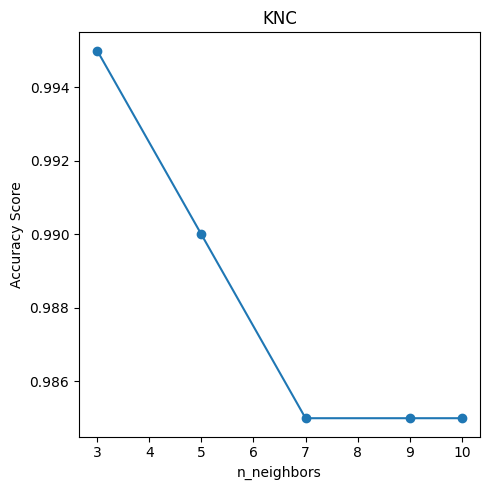

In [ ]:
# กำหนดช่วงค่า C
n_neighbors = [3,5,7,9,10]

# สร้างโมเดลด้วค่า C ต่างๆ ให้โมเดลเรียนรู้จากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้ แล้วทดสอบโมเดลด้วย accuracy score
accuracy = []
for n in n_neighbors:
    clf = KNC(n_neighbors=n, weights='uniform')
    clf.fit(x, y)

    # ทำนายค่า y โดยใช้โมเดล
    prediction = clf.predict(x)

    # คำนวณ accuracy score
    accuracy.append(accuracy_score(y, prediction))

# แสดงผล
plt.figure(figsize = (5,5))
plt.plot(n_neighbors, accuracy, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Score')
plt.title('KNC')
plt.tight_layout()
plt.show()

## k-NN เมื่อปรับค่า 'weights' ของจุดข้อมูล

โมเดลจะจำแนกคลาสของจุดข้อมูลที่สนใจจากจุดข้อมูลที่อยู่ใกล้เคียงจำนวน 'n_neighbors' โดยเลือกคลาสที่มีจำนวนมากที่สุดเป็นคลาสของจุดข้อมูลที่สนใจ

ที่ผ่านมาเราใช้ `weights='unform'` ซึ่งเป็นการให้น้ำหนักกับทุกจุดข้อมูลเท่ากัน (ซึ่งเป็นค่า default)  ในไลบรารี่ `scikit-learn` มีทางเลือกให้โมเดลสามารถให้นำ้หนักจุดข้อมูลต่างกัน โดยอ้างอิงตามระยะห่างของจุดข้อมูลนั้นและจุดที่สนใจ โดยใช้ `weights='distance'`

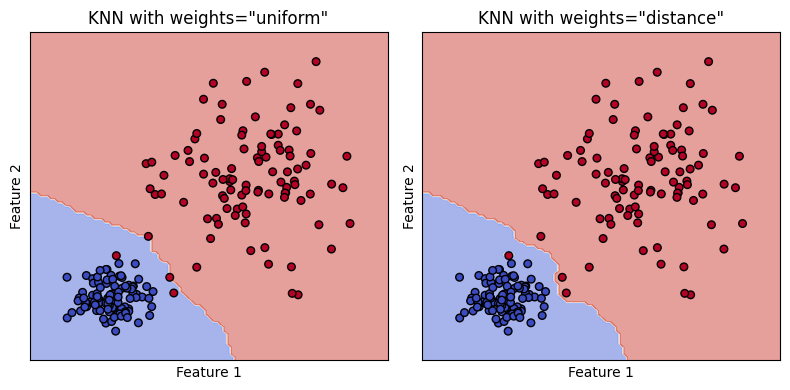

In [ ]:
# สร้างชุดโมเดล
models = (KNC(weights='uniform'),
          KNC(weights='distance')
          )

# สอนโมเดลจากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้
models = (clf.fit(x, y) for clf in models)

# ตั้งชื่อ plot ที่สอดคล้องกับชุดข้อมูล
titles = ['KNN with weights="uniform"',
          'KNN with weights="distance"'
          ]

# plot the decision boundaries
fig, axes = plt.subplots(1,2, figsize=(8, 4))
for clf, title, ax in zip(models, titles, axes.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(clf,
                                                  x,
                                                  response_method="predict",
                                                  cmap=plt.cm.coolwarm,
                                                  alpha=0.5,
                                                  ax=ax,
                                                  xlabel='Feature 1',
                                                  ylabel='Feature 2',
                                                  )
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.tight_layout()
plt.show()

รูปแสดง decision boundary ของโมเดล k-NN เมื่อเลือกกำหนด weights ต่างกัน

## k-NN pipeline

### Generate 3-class dataset

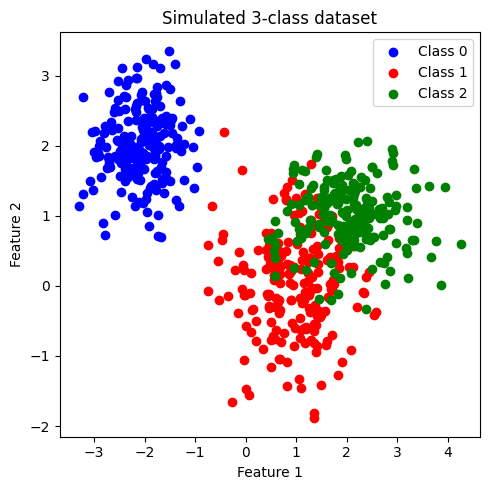

In [ ]:
# สร้างข้อมูลโดยการเรียกใช้ generate_multi_class_dataset
# กำหนด จำนวนคลาส
n_classes = 3

# กำหนดช่วงค่า Mean และ standard deviation สำหรับแต่ละคลาส
mean_class = [[-2,2], [1,0], [2,1]]
std_class  = [[0.5,0.5], [0.75,0.75],[0.75,0.5]]

# กำหนดจำนวนข้อมูล สำหรับแต่ละคลาส
n_samples = 200

# ทำการสร้างชุดข้อมูล
x, y = generate_multi_class_dataset(n_classes, mean_class, std_class,n_samples)

# Plot ข้อมูล x, y ที่สร้างขึ้น
plt.figure(figsize = (5,5))
color_list = ['b','r','g']
for label in range(n_classes):
    plt.scatter(x[y==label, 0], x[y==label, 1], c=color_list[label], label='Class '+str(label))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated 3-class dataset')
plt.legend()
plt.tight_layout()
plt.show()


ข้อมูลที่สร้างขึ้นประกอบด้วย 2 features และ label แบ่งเป็น 3 กลุ่ม (class: 0, 1, 2) เราจะพัฒนาโมเดล k-NN เพื่อจำแนกข้อมูลในแต่ละกลุ่ม

เมื่อสังเกตการกระจายตัวของข้อมูล พบว่า class 0 มีการกระจายข้อมูลแบ่งแยกออกมาอย่างเห็นได้ชัด ในขณะที่ class 1 และ class 2 กระจายตัวอยู่ร่วมกัน

### แบ่งข้อมูลเป็น training data และ test data

โดยใช้ [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) จากไลบรารี่ `scikit-learn`

ในตัวอย่างนี้เราจะใช้ default value ซึ่งจะ shuffle ข้อมูลก่อนแบ่งข้อมูล และ ไม่ stratify (ไม่กำกับสัดส่วนของ class ใน training data และ test data)

อย่างไรก็ดี ในกรณีที่ข้อมูลประกอบด้วย class ต่างๆ ที่มีสัดส่วนต่างกันอย่างมาก (imbalanced dataset) การทำ stratify มีความจำเป็นอย่างมากเพื่อคงสัดส่วนของแต่ละ class ใน training data และ test data

In [ ]:
# สร้าง training data และ test data โดยแบ่งจากชุดข้อมูล x,y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    stratify=None,
                                                    shuffle=True,
                                                    random_state=RANDOM_SEED)

print('Train set: จำนวนข้อมูล แบ่งกลุ่มตาม class label')
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

print('Test set: จำนวนข้อมูล แบ่งกลุ่มตาม class label')
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

Train set: จำนวนข้อมูล แบ่งกลุ่มตาม class label
[[  0. 169.]
 [  1. 155.]
 [  2. 156.]]
Test set: จำนวนข้อมูล แบ่งกลุ่มตาม class label
[[ 0. 31.]
 [ 1. 45.]
 [ 2. 44.]]


### ทำการ standardize ข้อมูลทั้งหมด
ใช้ mean และ standard deviation (SD) จาก training data ในการ standardize test set เพื่อป้องกัน information leak

In [ ]:
# สร้าง standardized scaler จาก features ใน training data
x_scaler = StandardScaler().fit(x_train)

# scale ค่า features ใน training data และ test data
x_train = x_scaler.transform(x_train)
x_test  = x_scaler.transform(x_test)

### เทรนโมเดล ด้วย base model (default hyperparameter)

Training Set: Classification report
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       169
         1.0       0.89      0.87      0.88       155
         2.0       0.89      0.89      0.89       156

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480


Test Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       0.81      0.87      0.84        45
         2.0       0.85      0.80      0.82        44

    accuracy                           0.88       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.88      0.88      0.87       120



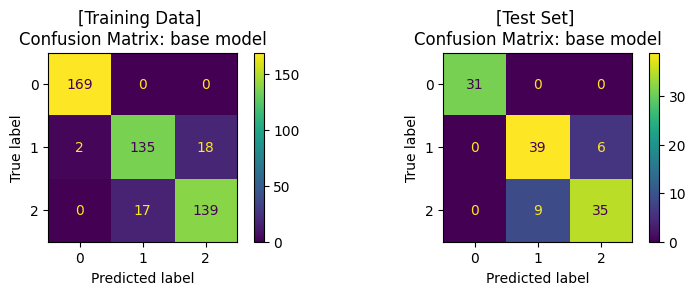

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# สร้างโมเดล
base_clf = KNC()

# สอนโมเดลด้วย training data
base_clf.fit(x_train,y_train)

# ให้โมเดลทำนาย training data
y_pred = base_clf.predict(x_train)

# แสดงผล classification ของโมเดลจาก training data
print('Training Set: Classification report')
print(classification_report(y_train, y_pred))

# คำนวนและแสดงผล confusion matrix ของ training data
cm = confusion_matrix(y_train, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax1)
ax1.set_title('[Training Data] \nConfusion Matrix: base model')

# ให้โมเดลทำนาย test data
y_pred = base_clf.predict(x_test)

# แสดงผล classification ของโมเดล
print('\nTest Set: Classification report')
print(classification_report(y_test, y_pred))

# คำนวนและแสดงผล confusion matrix ของ test set
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax2)
ax2.set_title('[Test Set] \nConfusion Matrix: base model')

plt.tight_layout()
plt.show()

### ปรับแต่งโมเดล (Hyperparameter Tuning) ด้วย [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) และ train โมเดล

โดยเราจะปรับแต่งโมเดล โดย tune 2 hyperparameters ที่สำคัญของ logistic regression ได้แก่
1. 'weights'
2. 'n_neighbors'

ในไลบรารี่ `scikit-learn` ยังมีวิธีการอื่นๆ ในการปรับแต่งโมเดล เช่น
- [CrossValScore](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)
- [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)



Best hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score: 0.90
Training Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       169
         1.0       1.00      1.00      1.00       155
         2.0       1.00      1.00      1.00       156

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480


Test Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       0.83      0.89      0.86        45
         2.0       0.88      0.82      0.85        44

    accuracy                           0.89       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.89      0.89      0.89       120



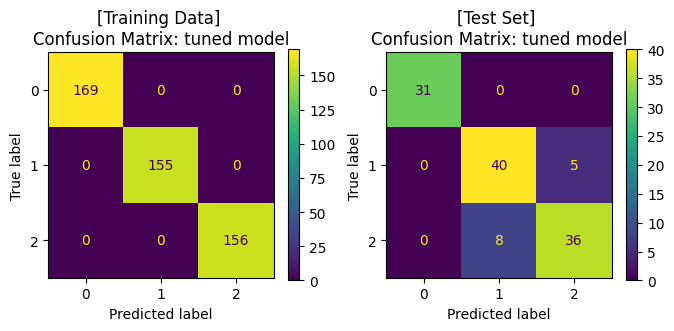

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# กำหนดช่วงค่า hyperparameters ในรูปแบบ dictionary
clf_params = {'weights': ['uniform','distance'],
              'n_neighbors': [3, 5, 7, 9, 11]
              }

# แบ่งข้อมูล training data ด้วย 5-fold cross-validation เพื่อ tune hyperparameter
cv_splitter = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

# ใช้ GridSearchCV เพื่อสอนโมเดลจากชุดค่า hyperparameters จาก clf_params
# และคำนวณค่า accuracy ของแต่ละโมเดล เพื่อเลือกชุด hyperparameters ที่ดีที่สุด
# โดยใช้เทคนิค cross-validation ในการแบ่งกลุ่ม validation data จาก training data
tuned_clf = GridSearchCV(estimator=base_clf, param_grid=clf_params,
                             scoring=['accuracy'], refit='accuracy', cv=cv_splitter)

# fit โมเดลด้วย training data และ ให้โมเดลทำนายค่า y จาก training data
tuned_clf.fit(x_train, y_train)
y_pred = tuned_clf.predict(x_train)

# แสดงผล hyperparameters ที่ดีที่สุด และ cross-validation score
print('Best hyperparameters: {}'.format(tuned_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(tuned_clf.best_score_))

# แสดงผล classification ของโมเดลจาก training data
print('Training Set: Classification report')
print(classification_report(y_train, y_pred))

# คำนวนและแสดงผล confusion matrix ของโมเดลจาก training data
cm = confusion_matrix(y_train, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax1)
ax1.set_title('[Training Data] \nConfusion Matrix: tuned model')

# ให้โมเดลทำนายค่า y จาก test data
y_pred = tuned_clf.predict(x_test)

# แสดงผล classification ของโมเดล จาก test data
print('\nTest Set: Classification report')
print(classification_report(y_test, y_pred))
# คำนวนและแสดงผล confusion matrix จาก test data
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax2)
ax2.set_title('[Test Set] \nConfusion Matrix: tuned model')

plt.show()

จะสังเกตได้ว่า เมื่อมีการปรับจูน hyperparameters ของโมเดลให้มีความเหมาะสมแล้ว เราได้โมเดลที่เรียนรู้จากข้อมูลชุดเดิม แล้วสามารถทำนายได้ค่า accuracy ที่สูงขึ้น โดยเมื่อพิจารณา Confusion Matrix จะพบว่า โมเดลสามารถจำแนกข้อมูล class 1 และ class 2 ได้ดีขึ้น

Discuss: ถ้า data เยอะ k-nnn จะไม่ effiency เพราะ ต้องคำนวณหา neigbors ของแต่ละจุดจะใช้เวลานาน  และเมื่อมี data เข้ามาเพิ่มก็ต้องคำนวณใหม่